In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 100)
#to set off the annoying copy warning
#pd.set_option('mode.chained_assignment', None) #'warn'

In [2]:
#pwd

In [3]:
#Ocean data
dfO_heat = pd.DataFrame()

#dfO_acidity = pd.read_csv(r'C:\Users\migue\Desktop\OCEAN\ocean-acidity_fig-1.csv', ',') #, encoding='latin-1') #bad sampling
dfO_heat = pd.read_csv(r'C:\Users\migue\Desktop\OCEAN\ocean-heat_fig-1.csv', ',')
dfO_level = pd.read_csv(r'C:\Users\migue\Desktop\OCEAN\sea-level_fig-1.csv', ',')
dfO_temp = pd.read_csv(r'C:\Users\migue\Desktop\OCEAN\sea-surface-temp_fig-1.csv', ',')

#Change in latitute and depth of marine species
#dfO_marine = pd.read_csv(r'C:\Users\migue\Desktop\OCEAN\marine-species_fig-1.csv', ',')

#Green House gasses
dfA_gasses = pd.read_csv(r'C:\Users\migue\Desktop\OCEAN\climate-forcing_fig-1.csv', ',')

#Global temperatures : Do I need it?
#dfG_means = pd.read_csv(r'C:\Users\migue\Desktop\OCEAN\GLB.Ts+dSST.csv', ',')

#next time try this for the utf8 error
#('u.item', encoding='utf8', errors='ignore')

C:\Users\migue\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Missing migrant data

import glob
#import pandas as pd

df_Mig = pd.concat(map(pd.read_csv, glob.glob(r'C:\Users\migue\Desktop\OCEAN\migration\*.csv')))

#list(dfMig_2021.columns)
col_to_drop = ['Main ID', 'Incident ID', 'Region','Incident Date','Reported Month','Location of death',
               'Information Source','Coordinates','Migrantion route','URL','UNSD Geographical Grouping','Source Quality']

df_Mig = df_Mig.drop(columns = col_to_drop)
#df_Mig

In [5]:
def migration_historical_df(dataset):
    migration_df = pd.DataFrame()
    years = pd.unique(dataset['Year'])
    
    for year in years:
        selected_year = dataset[dataset['Year'] == year]
        year = selected_year.iloc[0]['Year']
            
        df_temp = pd.DataFrame()
        temp_num = pd.DataFrame()
        temp_cat = pd.DataFrame()
        
        col_class = list(selected_year.columns)
        col_drop = ['Year']

        for i in range(len(col_drop)):
            col_d = (col_drop[i])
            del_index = col_class.index(col_d) 
            del col_class[del_index]
        
        for col_name in col_class:
            if selected_year[col_name].dtype == 'O':
                temp_cat = temp_cat.append(selected_year[col_name])
            else:
                temp_num = temp_num.append(selected_year[col_name])
    
        temp_cat = temp_cat.T
        col_cat = list(temp_cat.columns)
        temp_num = temp_num.T
        col_num = list(temp_num.columns)

        likelihood = pd.DataFrame()
        sums = pd.DataFrame()

        df_temp['Year'] = [year]

        for colName in col_num:
            sum_col = temp_num[colName].sum()
            sums[colName] = [sum_col]

        df_temp = pd.concat([df_temp, sums], axis=1)
    
        for colName in col_cat:             
            #for a global non specific likelihood
            value_counts = temp_cat[colName].value_counts() #[:2] #colName
            val_counts = pd.DataFrame(value_counts)
            likelihood = val_counts.reset_index()
            likelihood = likelihood.T
            likelihood.columns = likelihood.iloc[0]
            likelihood = likelihood.drop(labels='index', axis=0)
            likelihood.reset_index(drop=True, inplace=True)
            likelihood = likelihood.add_suffix(f" |{colName}") #colName
            sum_like = float(likelihood.sum(axis=1))

        for col in likelihood.columns:
            like = 0
            like = likelihood.iloc[0][col] / sum_like
            likelihood[col][0] = like

        df_temp = pd.concat([df_temp, likelihood], axis=1)
    
        migration_df = migration_df.append(df_temp)
    
    return migration_df

In [6]:
df_migration = migration_historical_df(df_Mig)

In [7]:
#heat mean
dfO_heat['Year'] = dfO_heat['Year'].astype(int)

dfO_heat_col = list(dfO_heat.columns)
del dfO_heat_col[0]
del dfO_heat_col[0]
dfO_heat['ocean heat mean'] = dfO_heat.loc[:, dfO_heat_col].mean(axis=1)

dfO_heat_col2 = list(dfO_heat.columns)
del dfO_heat_col2[0]
del dfO_heat_col2[-1]
dfO_heat = dfO_heat.drop(dfO_heat_col2, 1)

C:\Users\migue\AppData\Local\Temp/ipykernel_17256/1055578193.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfO_heat = dfO_heat.drop(dfO_heat_col2, 1)


In [8]:
dfO_level['Year'] = dfO_level['Year'].astype(int)

dfO_level_col = list(dfO_level.columns)
del dfO_level_col[0]
dfO_level['ocean level mean'] = dfO_level.loc[:, dfO_level_col].mean(skipna=True, axis=1)

dfO_level_col2 = list(dfO_level.columns)
del dfO_level_col2[0]
del dfO_level_col2[-1]
dfO_level = dfO_level.drop(dfO_level_col2, 1)

C:\Users\migue\AppData\Local\Temp/ipykernel_17256/166758784.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfO_level = dfO_level.drop(dfO_level_col2, 1)


In [9]:
dfO_temp['Year'] = dfO_temp['Year'].astype(int)

dfO_temp_col = list(dfO_temp.columns)
del dfO_temp_col[0]
dfO_temp['ocean temp mean'] = dfO_temp.loc[:, dfO_temp_col].mean(skipna=True, axis=1)

dfO_temp_col2 = list(dfO_temp.columns)
del dfO_temp_col2[0]
del dfO_temp_col2[-1]
dfO_temp = dfO_temp.drop(dfO_temp_col2, 1)


C:\Users\migue\AppData\Local\Temp/ipykernel_17256/802947117.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfO_temp = dfO_temp.drop(dfO_temp_col2, 1)


In [10]:
years = pd.unique(dfO_heat['Year'])
years = np.append(years, '2021')

df_ocean = pd.DataFrame()
df_ocean = df_ocean.assign(Year = years)
df_ocean['Year'] = df_ocean['Year'].astype(int)

In [11]:
#Merge DataFrames
df_ocean = pd.merge(df_ocean, dfO_heat, on='Year')
df_ocean = pd.merge(df_ocean, dfO_level, on='Year')
df_ocean = pd.merge(df_ocean, dfO_temp, on='Year')
df_ocean = pd.merge(df_ocean, dfA_gasses, on='Year') 

In [12]:
df_ocean.head()

,Year,ocean heat mean,ocean level mean,ocean temp mean,Carbon dioxide,Methane,Nitrous oxide,CFC-12,CFC-11,15 other gases
0,1979,-1.705333,5.362205,0.048,1.027,0.406,0.104,0.092,0.040,0.031
1,1980,-0.388333,5.598425,0.066,1.058,0.413,0.104,0.097,0.042,0.034
2,1981,-0.174667,6.086614,-0.006,1.077,0.420,0.107,0.102,0.044,0.036
3,1982,-1.551000,5.858268,-0.006,1.089,0.426,0.111,0.107,0.046,0.038
4,1983,-2.430000,6.188976,0.138,1.115,0.429,0.113,0.113,0.048,0.041


In [13]:
dfO_norm = df_ocean.copy()

# apply normalization techniques by Column 1
columns_to_norm = list(dfO_norm.columns)
del columns_to_norm[0]

for col in columns_to_norm:
    dfO_norm[col] = (dfO_norm[col] - dfO_norm[col].min()) / (dfO_norm[col].max() - dfO_norm[col].min())    

dfO_norm.head()

,Year,ocean heat mean,ocean level mean,ocean temp mean,Carbon dioxide,Methane,Nitrous oxide,CFC-12,CFC-11,15 other gases
0,1979,0.035300,0.000000,0.155172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1980,0.099454,0.057375,0.172414,0.029552,0.063636,0.000000,0.060976,0.074074,0.030612
2,1981,0.109863,0.175950,0.103448,0.047664,0.127273,0.030612,0.121951,0.148148,0.051020
3,1982,0.042818,0.120488,0.103448,0.059104,0.181818,0.071429,0.182927,0.222222,0.071429
4,1983,0.000000,0.200813,0.241379,0.083889,0.209091,0.091837,0.256098,0.296296,0.102041


In [14]:
import matplotlib.pyplot as plt

Investigative plotting

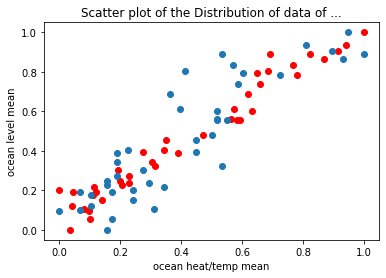

In [15]:
plt.title('Scatter plot of the Distribution of data of ...')
plt.scatter(dfO_norm['ocean heat mean'], dfO_norm['ocean level mean'], color='red')
plt.scatter(dfO_norm['ocean temp mean'], dfO_norm['ocean level mean'])
plt.xlabel('ocean heat/temp mean')
plt.ylabel('ocean level mean')
plt.show()

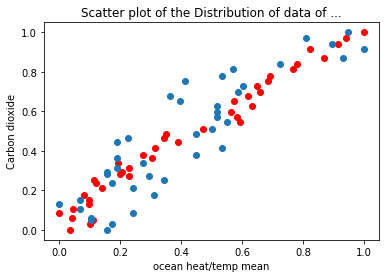

In [16]:
plt.title('Scatter plot of the Distribution of data of ...')
plt.scatter(dfO_norm['ocean heat mean'], dfO_norm['Carbon dioxide'], color = 'red')
plt.scatter(dfO_norm['ocean temp mean'], dfO_norm['Carbon dioxide'])
plt.xlabel('ocean heat/temp mean')
plt.ylabel('Carbon dioxide')
plt.show()

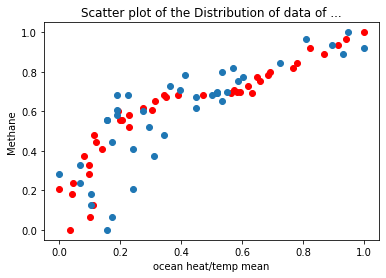

In [17]:
plt.title('Scatter plot of the Distribution of data of ...')
plt.scatter(dfO_norm['ocean heat mean'], dfO_norm['Methane'], color = 'red')
plt.scatter(dfO_norm['ocean temp mean'], dfO_norm['Methane'])
plt.xlabel('ocean heat/temp mean')
plt.ylabel('Methane')
plt.show()

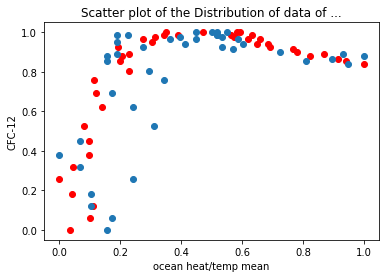

In [18]:
plt.title('Scatter plot of the Distribution of data of ...')
plt.scatter(dfO_norm['ocean heat mean'], dfO_norm['CFC-12'], color = 'red')
plt.scatter(dfO_norm['ocean temp mean'], dfO_norm['CFC-12'])
plt.xlabel('ocean heat/temp mean')
plt.ylabel('CFC-12')
plt.show()

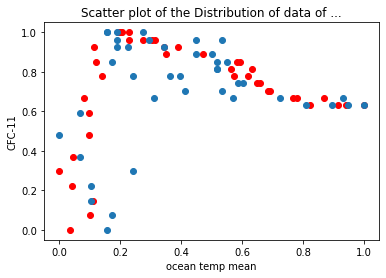

In [19]:
plt.title('Scatter plot of the Distribution of data of ...')
plt.scatter(dfO_norm['ocean heat mean'], dfO_norm['CFC-11'], color = 'red')
plt.scatter(dfO_norm['ocean temp mean'], dfO_norm['CFC-11'])
plt.xlabel('ocean temp mean')
plt.ylabel('CFC-11')
plt.show()

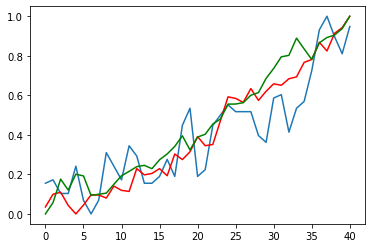

In [20]:
plt.plot(dfO_norm['ocean temp mean'])
plt.plot(dfO_norm['ocean heat mean'], color = 'red')
plt.plot(dfO_norm['ocean level mean'], color = 'green')
plt.show()

In [21]:
#Multiple linear regression

In [22]:
#dfO_norm.to_csv('oceanNormData.csv')
dfO_norm.head()

,Year,ocean heat mean,ocean level mean,ocean temp mean,Carbon dioxide,Methane,Nitrous oxide,CFC-12,CFC-11,15 other gases
0,1979,0.035300,0.000000,0.155172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1980,0.099454,0.057375,0.172414,0.029552,0.063636,0.000000,0.060976,0.074074,0.030612
2,1981,0.109863,0.175950,0.103448,0.047664,0.127273,0.030612,0.121951,0.148148,0.051020
3,1982,0.042818,0.120488,0.103448,0.059104,0.181818,0.071429,0.182927,0.222222,0.071429
4,1983,0.000000,0.200813,0.241379,0.083889,0.209091,0.091837,0.256098,0.296296,0.102041


In [23]:
#separate the other attributes from the predicting attribute
X = dfO_norm.drop(['Year', 'ocean level mean'],axis=1)
#separte the predicting attribute into Y for model training 
y = dfO_norm['ocean level mean']

In [24]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 42)

In [25]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [26]:
y_prediction =  LR.predict(X_test)

#y_prediction
#y_test

In [27]:
# importing r2_score module
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error

In [28]:
# predicting the accuracy score
#score=r2_score(y_test,y_prediction)

#print('r2 socre is ',score)
#print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
#print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

____________________
create defs for midi input prediction

In [29]:
#predict ocean LEVEL
def ocean_level(midi_input):
    
    X = dfO_norm[['ocean heat mean', 'ocean temp mean', 'Carbon dioxide']] #train with all the data
    y = dfO_norm['ocean level mean'] #target all the data
    
    inputDF = pd.DataFrame(columns = ['ocean heat mean', 'ocean temp mean', 'Carbon dioxide'])
    inputDF.loc[0, 'ocean heat mean'] = midi_input[0][1]
    inputDF.loc[0, 'ocean temp mean'] = midi_input[0][2]
    inputDF.loc[0, 'Carbon dioxide'] = midi_input[0][3]
    
    LR.fit(X,y)
    ocean_LEVEL =  LR.predict(inputDF)
    
    return ocean_LEVEL

In [30]:
#predict ocean HEAT
def ocean_heat(midi_input):
    
    X = dfO_norm[['ocean level mean', 'ocean temp mean', 'Carbon dioxide']] #train with all the data
    y = dfO_norm['ocean heat mean'] #target all the data
    
    inputDF = pd.DataFrame(columns = ['ocean level mean', 'ocean temp mean', 'Carbon dioxide'])
    inputDF.loc[0, 'ocean level mean'] = midi_input[0][0]
    inputDF.loc[0, 'ocean temp mean'] = midi_input[0][2]
    inputDF.loc[0, 'Carbon dioxide'] = midi_input[0][3]
    
    LR.fit(X,y)
    ocean_HEAT =  LR.predict(inputDF)
    
    return ocean_HEAT

In [31]:
#predict ocean TEMP
def ocean_temp(midi_input):
    
    X = dfO_norm[['ocean heat mean', 'ocean level mean', 'Carbon dioxide']] #train with all the data
    y = dfO_norm['ocean temp mean'] #target all the data
    
    inputDF = pd.DataFrame(columns = ['ocean heat mean', 'ocean level mean', 'Carbon dioxide'])
    inputDF.loc[0, 'ocean level mean'] = midi_input[0][0]
    inputDF.loc[0, 'ocean heat mean'] = midi_input[0][1]
    inputDF.loc[0, 'Carbon dioxide'] = midi_input[0][3]
    
    LR.fit(X,y)
    ocean_TEMP =  LR.predict(inputDF)
    
    return ocean_TEMP

In [32]:
#predict ocean CO
def ocean_co(midi_input):
    
    X = dfO_norm[['ocean heat mean', 'ocean level mean', 'ocean temp mean']] #train with all the data
    y = dfO_norm['Carbon dioxide'] #target all the data
    
    inputDF = pd.DataFrame(columns = ['ocean heat mean', 'ocean level mean', 'ocean temp mean'])
    inputDF.loc[0, 'ocean level mean'] = midi_input[0][0]
    inputDF.loc[0, 'ocean heat mean'] = midi_input[0][1]
    inputDF.loc[0, 'ocean temp mean'] = midi_input[0][2]
    
    LR.fit(X,y)
    ocean_CO =  LR.predict(inputDF)
    
    return ocean_CO

--------------------------------------------------------------------------------------
Send an OSC to SuperCollider

In [33]:
import socket
hostname = socket.gethostname()
local_ip = socket.gethostbyname(hostname)

In [34]:
local_ip

'127.0.0.1'

In [35]:
pip install python-osc

In [36]:
from pythonosc.udp_client import SimpleUDPClient

In [37]:
#python IP and OSc port


In [38]:
ip = "127.0.0.1" #default IP
port = 57120 #SuperCollider port
client = SimpleUDPClient(ip, port)  #Create client

In [39]:
#client.send_message("sea level", y_prediction)   # Send message

_____________________________________________
setting MIDI

In [40]:
#pip install pygame

In [41]:
#import pygame
#from pygame.locals import *
#from pygame import midi

In [42]:
#pygame.midi.init()
#pygame.midi.get_init()

_____

In [43]:
#pip install mido

In [44]:
import mido

In [ ]:
instrument = mido.get_input_names()
new_data_ocean = []

knob_level = 0
knob_heat = 0
knob_temp = 0
knob_co = 0

fade_underc = 0
fade_midI = 0
fade_midII = 0
fade_drops = 0


with mido.open_input(instrument[0]) as p: 
    for msg in p:
        #print(msg, end = "\r") #check type, note, value, etc...
        
        if msg.type == 'control_change' and msg.control == 1:
            knob_level = msg.value/127 
            knob_level = round(knob_level,2)
            
        elif msg.type == 'control_change' and msg.control == 2:
            knob_heat = msg.value/127 
            knob_heat = round(knob_heat,2)
            
        elif msg.type == 'control_change' and msg.control == 3:
            knob_temp = msg.value/127 
            knob_temp = round(knob_temp,2)
            
        elif msg.type == 'control_change' and msg.control == 4:
            knob_co = msg.value/127 
            knob_co = round(knob_co,2)
            
        elif msg.type == 'control_change' and msg.control == 5:
            fade_underc = msg.value/127 
            #fade_underc = round(fade_underc,2)
            client.send_message("Fade underc: ", fade_underc)
            print(f"Fade underc: {fade_underc}          ", end = '\r')
            
        elif msg.type == 'control_change' and msg.control == 6:
            fade_midI = msg.value/127 
            #fade_midI = round(fade_midI,2)
            client.send_message("Fade midI: ", fade_midI)
            print(f"Fade midI: {fade_midI}          ", end = '\r')
            
        elif msg.type == 'control_change' and msg.control == 7:
            fade_midII = msg.value/127 
            #fade_midII = round(fade_midII,2)
            client.send_message("Fade midII: ", fade_midII)
            print(f"Fade midII: {fade_midII}          ", end = '\r')
            
        elif msg.type == 'control_change' and msg.control == 8:
            fade_drops = msg.value/127 
            #fade_drops = round(fade_drops,2)
            client.send_message("Fade drops: ", fade_drops)
            print(f"Fade drops: {fade_drops}          ", end = '\r')
            
        elif msg.type == 'note_on' and msg.note == 40:
            new_data_ocean.append([knob_level, knob_heat, knob_temp, knob_co])
            
            #predict sea level and send to SuperCollider
            ocean_LEVEL = ocean_level(new_data_ocean)
            client.send_message("Ocean Level: ", ocean_LEVEL)
            
            #print(new_data_ocean[0], end = '\r')
            print(f"ocean level: {ocean_LEVEL}          ", end = '\r')
            new_data_ocean = []
        
        elif msg.type == 'note_on' and msg.note == 41:
            new_data_ocean.append([knob_level, knob_heat, knob_temp, knob_co])
            
            #predict sea level and send to SuperCollider
            ocean_HEAT = ocean_heat(new_data_ocean)
            client.send_message("Ocean Heat: ", ocean_HEAT)
            
            #print(new_data_ocean[0], end = '\r')
            print(f"ocean heat: {ocean_HEAT}          ", end = '\r')
            new_data_ocean = []
        
        elif msg.type == 'note_on' and msg.note == 42:
            new_data_ocean.append([knob_level, knob_heat, knob_temp, knob_co])
            
            #predict sea level and send to SuperCollider
            ocean_TEMP = ocean_temp(new_data_ocean)
            client.send_message("Ocean Temperature: ", ocean_TEMP)
            
            #print(new_data_ocean[0], end = '\r')
            print(f"ocean temp: {ocean_TEMP}          ", end = '\r')
            new_data_ocean = []
        
        elif msg.type == 'note_on' and msg.note == 43:
            new_data_ocean.append([knob_level, knob_heat, knob_temp, knob_co])
            
            #predict sea level and send to SuperCollider
            ocean_CO = ocean_co(new_data_ocean)
            client.send_message("Carbon Dioxide: ", ocean_CO)
            
            #print(new_data_ocean[0], end = '\r')
            print(f"ocean co: {ocean_CO}            ", end = '\r')
            new_data_ocean = []
            
        elif msg.type == 'note_on' and msg.note == 36:
            #underC = 'UnderC'
            client.send_message('UnderC', 0)
        elif msg.type == 'note_on' and msg.note == 37:
            #midI = 'midI'
            client.send_message('MidI', 0)
        elif msg.type == 'note_on' and msg.note == 38:
            #midII = 'midII'
            client.send_message('MidII', 0)
        elif msg.type == 'note_on' and msg.note == 39:
            #drops = 'drops'
            client.send_message('Drops', 0)
            

In [ ]:
#OSCFunc.trace(true); for Supercollider !!

In [39]:
#from lpd8.lpd8 import LPD8
#from lpd8.programs import Programs
#from lpd8.pads import Pad, Pads
#from lpd8.knobs import Knobs
#from lpd8.pgm_chg import Pgm_Chg

#from consummer import Consummer
#from time import sleep

#lpd8 = LPD8()
#lpd8.start()

#lpd8.set_not_sticky_knob(Programs.PGM_4, [Knobs.KNOB_1, Knobs.KNOB_2])

#lpd8.set_knob_limits(Programs.PGM_1, Knobs.KNOB_1, 0, 1, is_int=False)
#lpd8.set_knob_limits(Programs.PGM_1, Knobs.KNOB_2, 0, 1, is_int=False)
#lpd8.set_knob_limits(Programs.PGM_1, Knobs.KNOB_3, 0, 1, is_int=False)
#lpd8.set_knob_limits(Programs.PGM_1, Knobs.KNOB_4, 0, 1, is_int=False)

#lpd8.set_pad_mode(Programs.PGM_4, [Pads.PAD_1, Pads.PAD_2], Pad.SWITCH_MODE + Pad.BLINK_MODE)
#lpd8.set_pad_mode(Programs.PGM_4, Pads.PAD_3, Pad.SWITCH_MODE)
#lpd8.set_pad_mode(Programs.PGM_4, Pads.PAD_4, Pad.PUSH_MODE)

#lpd8.set_pad_switch_state(Programs.PGM_4, [Pads.PAD_1, Pads.PAD_3], Pad.ON)

#lpd8.subscribe(consummer.ctrl_value, Programs.PGM_4, LPD8.CTRL, Knobs.ALL_KNOBS)
#lpd8.subscribe(consummer.note_on_value, Programs.PGM_4, LPD8.NOTE_ON, Pads.ALL_PADS)
#lpd8.subscribe(consummer.note_off_value, Programs.PGM_4, LPD8.NOTE_OFF, Pads.ALL_PADS)
#lpd8.subscribe(consummer.pgm_change, Programs.PGM_4, LPD8.PGM_CHG, Pgm_Chg.PGM_CHG_4)
#lpd8.subscribe(consummer.pgm_change, Programs.PGM_4, LPD8.PGM_CHG, Pgm_Chg.PGM_CHG_4)

# We loop as long as test class allows it
#while consummer.is_running():

    # Every loop, we update pads status (blink, ON or OFF)
    # This method returns True if LPD8 pad is still running, False otherwise
 #   if lpd8.pad_update():
  #      sleep(.5)
   # else:

        # If LPD8 pad is not running anymore, we leave the loop
    #    consummer.stop()




In [43]:
# We tidy up things and kill LPD8 process
#lpd8.stop()

In [73]:
df_migration

,Year,Number Dead,Minimum Estimated Number of Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Mixed or unknown |Cause of Death,Drowning |Cause of Death,"Harsh environmental conditions / lack of adequate shelter, food, water |Cause of Death",Vehicle accident / death linked to hazardous transport |Cause of Death,Violence |Cause of Death,Accidental death |Cause of Death,Sickness / lack of access to adequate healthcare |Cause of Death
0,2014,1752.0,3566.0,6122.0,66.0,261.0,302.0,0.454248,0.294118,0.084967,0.081699,0.071895,0.009804,0.003268
0,2015,4077.0,2637.0,8099.0,225.0,820.0,301.0,0.284877,0.294256,0.114889,0.144197,0.097304,0.009379,0.0551
0,2016,4071.0,4013.0,17112.0,284.0,900.0,274.0,0.335654,0.189482,0.098995,0.147718,0.141531,0.005414,0.081206
0,2017,3664.0,2620.0,6888.0,535.0,1591.0,311.0,0.298375,0.237814,0.115953,0.187592,0.099705,0.003693,0.056869
0,2018,3176.0,1811.0,8321.0,1973.0,1760.0,360.0,0.294925,0.235224,0.084179,0.151642,0.094328,0.005373,0.134328
0,2019,3605.0,1777.0,4925.0,876.0,1763.0,527.0,0.330583,0.194169,0.066557,0.158416,0.09956,0.008251,0.142464
0,2020,2248.0,1992.0,6780.0,332.0,1545.0,157.0,0.20718,0.324607,0.1092,0.077038,0.056844,0.175019,0.050112
0,2021,2668.0,2405.0,8703.0,603.0,1691.0,262.0,0.158268,0.428346,0.177165,0.09685,0.080315,0.022835,0.03622


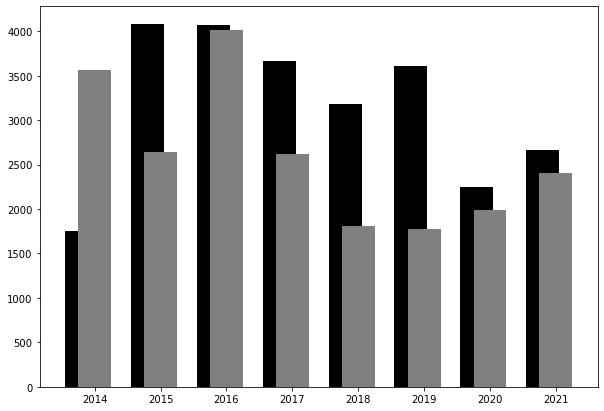

In [108]:
years = df_migration['Year']
deaths = df_migration['Number Dead']
missing = df_migration['Minimum Estimated Number of Missing']
surviv = df_migration['Number of Survivors']

fig = plt.figure(figsize =(10, 7))

#plt.bar(years, deaths, color= 'black')
#plt.bar(years, missing, color= 'red')
#plt.bar(years, surviv, color= 'black')

ax = plt.subplot(111)
ax.bar(years-0.2, deaths, width=0.5, color='black', align='center', label = "deaths")
ax.bar(years, missing, width=0.5, color='grey', align='center', label = "missing")
#ax.bar(years+0.2, surviv, width=0.5, color='g', align='center', label = "surviv")

plt.show()

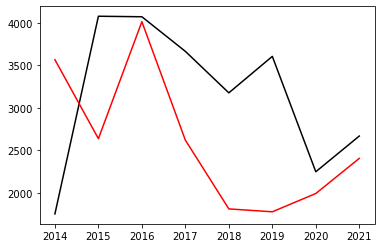

In [145]:
plt.plot(df_migration['Year'], df_migration['Number Dead'], color = 'black')
plt.plot(df_migration['Year'], df_migration['Minimum Estimated Number of Missing'], color = 'red')
#plt.plot(df_migration['Year'], df_migration['Number of Survivors'], color = 'green')
plt.show()

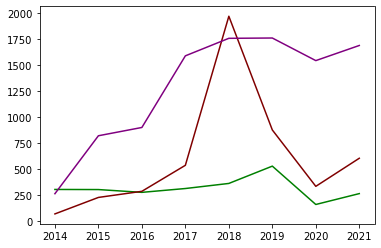

In [106]:
plt.plot(df_migration['Year'], df_migration['Number of Children'], color = 'green')
plt.plot(df_migration['Year'], df_migration['Number of Females'], color = 'maroon')
plt.plot(df_migration['Year'], df_migration['Number of Males'], color = 'purple')
plt.show()

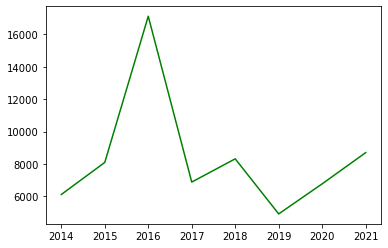

In [121]:
plt.plot(df_migration['Year'], df_migration['Number of Survivors'], color = 'green')
plt.show()

In [113]:
dfM_norm = df_migration.copy()

# apply normalization techniques by Column 1
columns_to_norm = list(dfM_norm.columns)
#
del columns_to_norm[-1]
del columns_to_norm[-1]
del columns_to_norm[-1]
del columns_to_norm[-1]
del columns_to_norm[-1]
del columns_to_norm[-1]
del columns_to_norm[-1]
del columns_to_norm[0]

for col in columns_to_norm:
    dfM_norm[col] = (dfM_norm[col] - dfM_norm[col].min()) / (dfM_norm[col].max() - dfM_norm[col].min())    

dfM_norm

,Year,Number Dead,Minimum Estimated Number of Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Mixed or unknown |Cause of Death,Drowning |Cause of Death,"Harsh environmental conditions / lack of adequate shelter, food, water |Cause of Death",Vehicle accident / death linked to hazardous transport |Cause of Death,Violence |Cause of Death,Accidental death |Cause of Death,Sickness / lack of access to adequate healthcare |Cause of Death
0,2014,0.000000,0.800089,0.098219,0.000000,0.000000,0.391892,0.454248,0.294118,0.084967,0.081699,0.071895,0.009804,0.003268
0,2015,1.000000,0.384615,0.260441,0.083377,0.372170,0.389189,0.284877,0.294256,0.114889,0.144197,0.097304,0.009379,0.0551
0,2016,0.997419,1.000000,1.000000,0.114316,0.425433,0.316216,0.335654,0.189482,0.098995,0.147718,0.141531,0.005414,0.081206
0,2017,0.822366,0.377013,0.161073,0.245936,0.885486,0.416216,0.298375,0.237814,0.115953,0.187592,0.099705,0.003693,0.056869
0,2018,0.612473,0.015206,0.278658,1.000000,0.998003,0.548649,0.294925,0.235224,0.084179,0.151642,0.094328,0.005373,0.134328
0,2019,0.796989,0.000000,0.000000,0.424751,1.000000,1.000000,0.330583,0.194169,0.066557,0.158416,0.09956,0.008251,0.142464
0,2020,0.213333,0.096154,0.152211,0.139486,0.854860,0.000000,0.20718,0.324607,0.1092,0.077038,0.056844,0.175019,0.050112
0,2021,0.393978,0.280859,0.310002,0.281594,0.952064,0.283784,0.158268,0.428346,0.177165,0.09685,0.080315,0.022835,0.03622


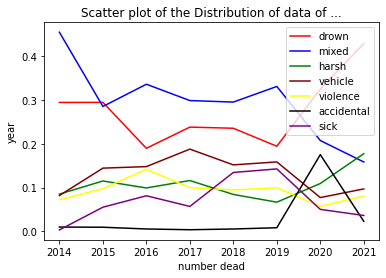

In [141]:
plt.title('Scatter plot of the Distribution of data of ...')
plt.plot(dfM_norm['Year'], dfM_norm['Drowning |Cause of Death'], color = 'red', label = 'drown')
plt.plot(dfM_norm['Year'], dfM_norm['Mixed or unknown |Cause of Death'], color = 'blue', label = 'mixed')
plt.plot(dfM_norm['Year'], dfM_norm['Harsh environmental conditions / lack of adequate shelter, food, water |Cause of Death'], color = 'green', label = 'harsh')
plt.plot(dfM_norm['Year'], dfM_norm['Vehicle accident / death linked to hazardous transport |Cause of Death'], color = 'maroon', label = 'vehicle')
plt.plot(dfM_norm['Year'], dfM_norm['Violence |Cause of Death'], color = 'yellow', label = 'violence')
plt.plot(dfM_norm['Year'], dfM_norm['Accidental death |Cause of Death'], color = 'black', label = 'accidental')
plt.plot(dfM_norm['Year'], dfM_norm['Sickness / lack of access to adequate healthcare |Cause of Death'], color = 'purple', label = 'sick')

plt.legend()
plt.xlabel('number dead')
plt.ylabel('year')
plt.show()


Prediction (Naive, Perceptron, Linear regression)

In [142]:
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [143]:
dfO_norm.head()

,Year,ocean heat mean,ocean level mean,ocean temp mean,Carbon dioxide,Methane,Nitrous oxide,CFC-12,CFC-11,15 other gases
0,1979,0.035300,0.000000,0.155172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1980,0.099454,0.057375,0.172414,0.029552,0.063636,0.000000,0.060976,0.074074,0.030612
2,1981,0.109863,0.175950,0.103448,0.047664,0.127273,0.030612,0.121951,0.148148,0.051020
3,1982,0.042818,0.120488,0.103448,0.059104,0.181818,0.071429,0.182927,0.222222,0.071429
4,1983,0.000000,0.200813,0.241379,0.083889,0.209091,0.091837,0.256098,0.296296,0.102041
